In [1]:
import numpy as np
import pandas as pd

import sys

import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams

In [2]:
# Visualisation global variables
%matplotlib inline
rcParams['figure.figsize'] = 20, 5
sb.set_style('darkgrid')

In [3]:
olympics = pd.read_csv('athlete_events.csv')

In [4]:
# Helper functions

def inspect(df):
    """ Prints various data charteristics, given df, where df is a pandas data frame """
    print("Data shape:", df.shape, "\n")
    print("\nColumns:", df.columns, "\n")
    print("\nAre there any NULLS\n", np.sum(df.isnull()))

def disp_pct(pct, allvals):
    ''' function to display percentages alogside values for pie charts '''
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# new df for the last year in df
latest = olympics.loc[olympics.Year == 2016]
# new df with dropped row with no medals
medals = olympics.dropna(subset=['Medal'])

In [5]:
inspect(olympics)

# As we can see there are some missing data in Age, Height, Weight and Medal
# In Medal - NaN means now medals earned, so if needed it can be replaced by None or something
# Age, Height and Weight - if needed can be replaced with mean value

Data shape: (271116, 15) 


Columns: Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object') 


Are there any NULLS
 ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


In [6]:
# As we can see above, there are few fields with NAN data - age, height, weight and medal
# We can substitude age, height and weight with mean if needed.
# Medals have NaN for no medals.

In [7]:
# Earliest and latest Olympics in dataset
print("Min year:", olympics.Year.min(), "\nMax year:", olympics.Year.max())

Min year: 1896 
Max year: 2016


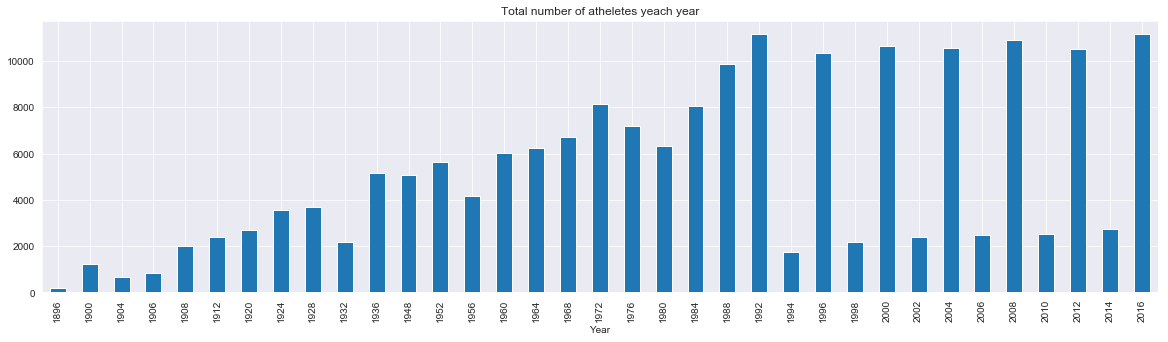

In [8]:
# How many atheletes take part in Games each year. 
olympics.groupby('Year').ID.nunique().plot(kind='bar', title="Total number of atheletes yeach year")

In [9]:
# ID - Unique number for EACH athlete, in other words, that is not row ID
# How many unique atheletes in dataset?

print("All unique atheletes: ", olympics.ID.nunique(), "\n")
print("Unique atheletes grouped by: ", olympics.groupby(['Sex']).ID.nunique())

All unique atheletes:  135571 

Unique atheletes grouped by:  Sex
F     33981
M    101590
Name: ID, dtype: int64


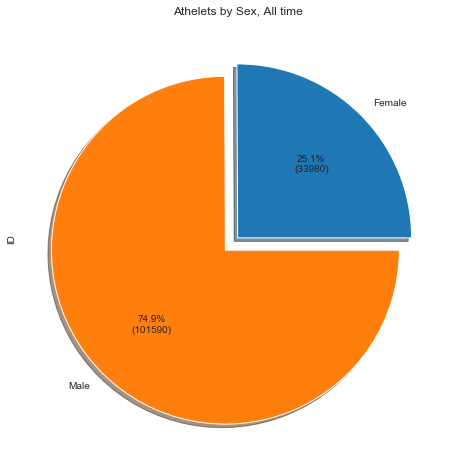

In [10]:
# Display piechart for Women/Men ratio
olympics.groupby(['Sex']).ID.nunique().plot(figsize=[8, 8], kind='pie', labels=('Female', 'Male'), title="Athelets by Sex, All time",
                                            shadow=True, explode=(0, 0.1), autopct=lambda pct: disp_pct(pct, olympics.ID.nunique()))
# Only 1/4 of all atheletes are women
# Such low ratio can be explaned below

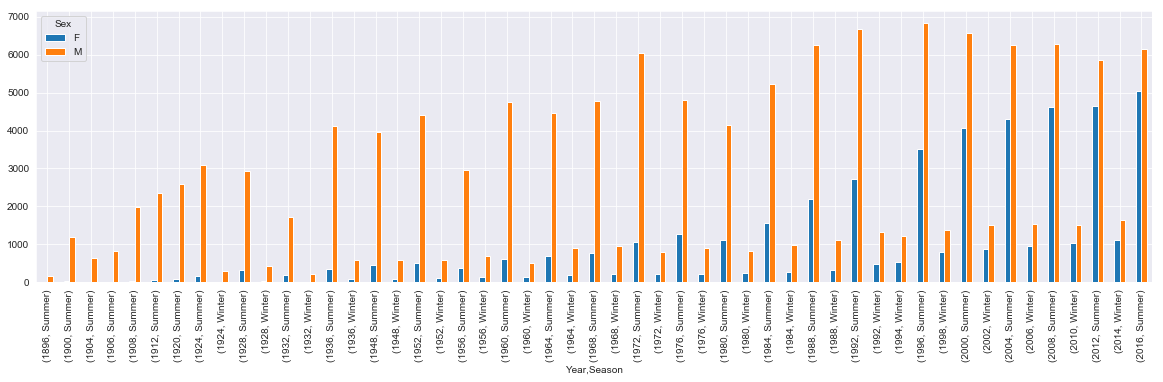

In [11]:
# Gender over time
# Note that Summer and Winter games were held in same year until 1992,
# after that they occur on a four year cycle.
olympics.groupby(['Year', 'Season', 'Sex']).ID.nunique().unstack(fill_value=0).plot(kind='bar')

# It seems like almost no women were allowed to participate in Olympics a century ago. 
# and as we can see more and more women atheletes participate in Olympics every year, soon it will hit 50/50 ratio.
# Another observation is that more people participate in Summer Olympic games rather than Winter, can't blame them, it can be cold outside ;)

In [12]:
print("Youngest Athelete:", olympics.Age.min(), "\nOldest Athelete:", olympics.Age.max())

Youngest Athelete: 10.0 
Oldest Athelete: 97.0


In [19]:
print('Oldest Athelete:')
olympics.loc[olympics.Age == olympics.Age.max()]

Oldest Athelete:


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
257054,128719,John Quincy Adams Ward,M,97.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN


In [20]:
print('Youngest Athelete:')
olympics.loc[olympics.Age == olympics.Age.min()]

Youngest Athelete:


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
142882,71691,Dimitrios Loundras,M,10.0,NaN,NaN,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze


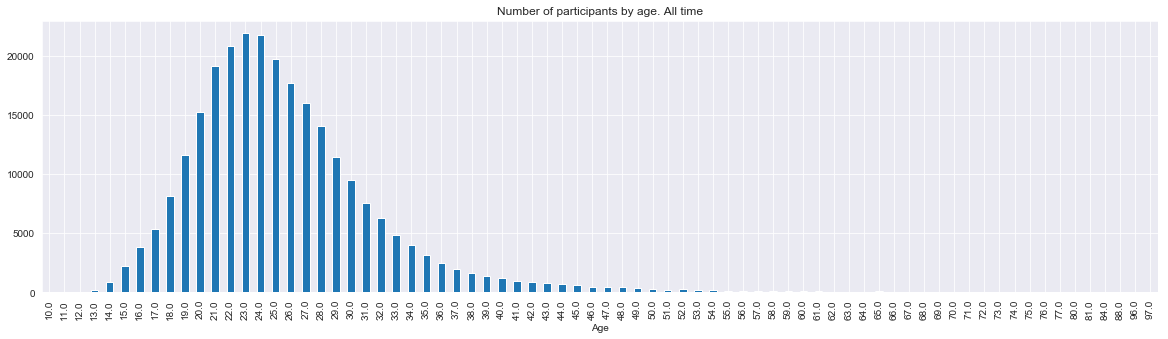

In [21]:
# How old atheletes who take part on Games.
# That shouldn't be unique atheletes as same athelete likely to take part in multiple Games
olympics.groupby(['Age']).Age.count().plot(kind='bar', title="Number of participants by age. All time")

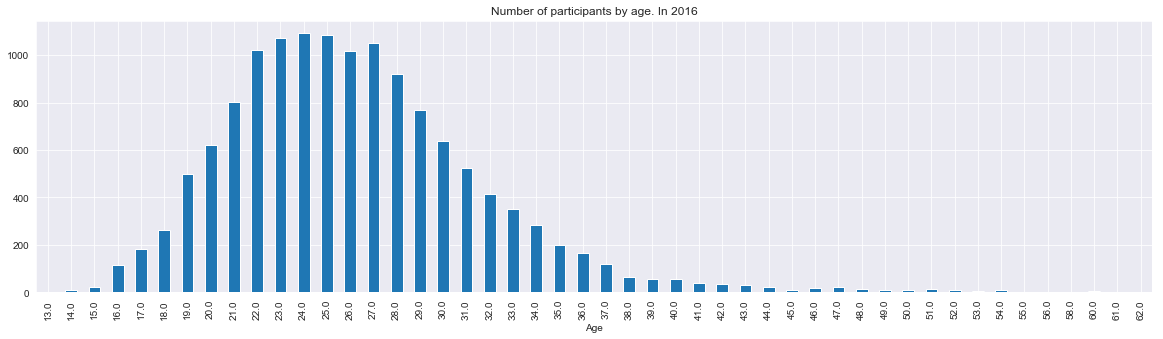

In [22]:
# in 2016 
latest.groupby(['Age']).Age.count().plot(kind='bar', title="Number of participants by age. In 2016")

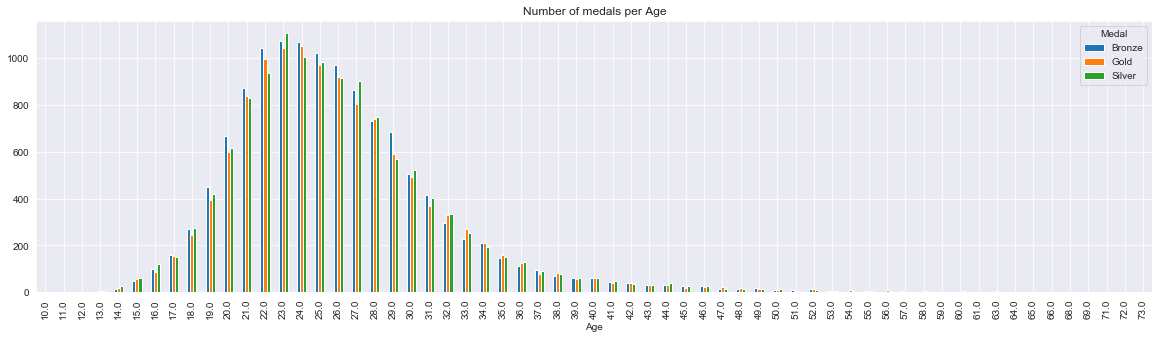

In [23]:
# Seems like number of medals are correlated with number of participants, no surprise here
olympics.groupby(['Age', 'Medal']).ID.nunique().unstack(fill_value=0).plot(kind='bar', title='Number of medals per Age')

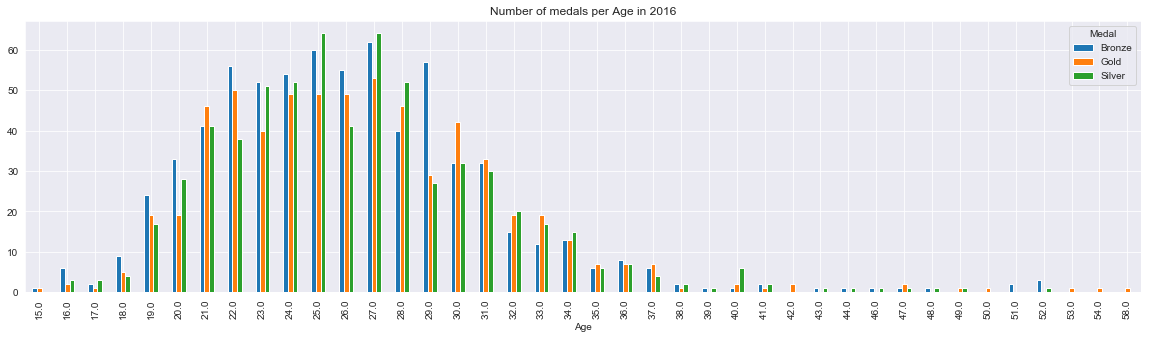

In [24]:
latest.groupby(['Age', 'Medal']).ID.nunique().unstack(fill_value=0).plot(kind='bar', title='Number of medals per Age in 2016')
# here we have much smaller spread as ages like 10 and 97 are exceptions
# interesting that there is a spike of bronze medals in age 29, it also present on historic data, but not so much
# quite a spike of gold medals in 30 years old

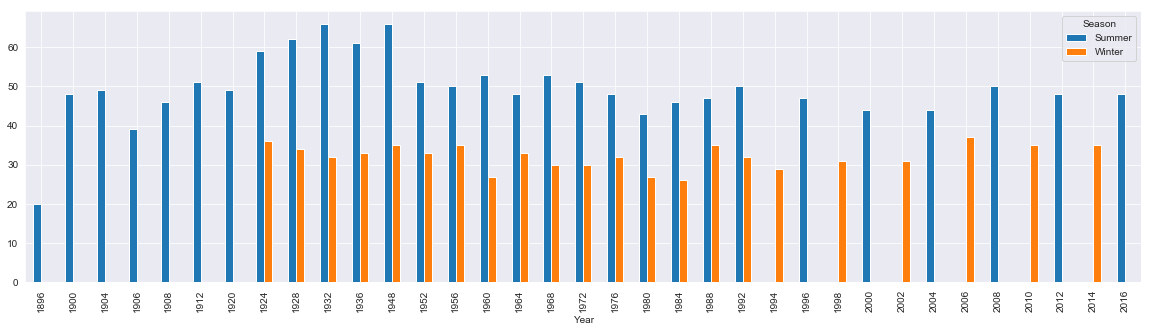

In [25]:
# Seems like Winter Games attract younger atheletes
olympics.groupby(['Year', 'Season']).Age.nunique().unstack(fill_value=0).plot(kind='bar')

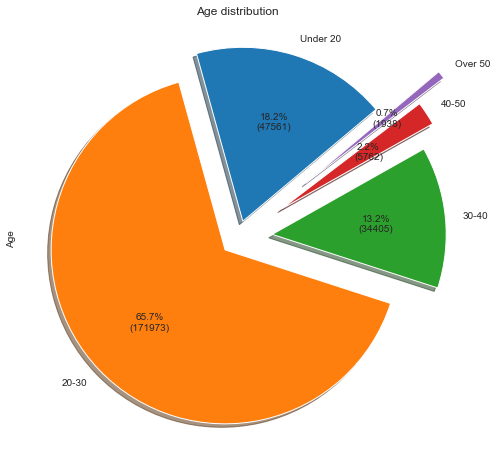

In [26]:
# Age distribution
# Under 20
# 20-30 
# 30-40
# 40-60
# over 60

age_groups = pd.cut(olympics.Age, bins=[0, 20, 30, 40, 50, 100], 
                    labels=['Under 20', '20-30', '30-40', '40-50', 'Over 50'])
olympics.Age.groupby(age_groups).count().plot(figsize=[8, 8], kind='pie', 
                                              title="Age distribution", shadow=True, startangle=40,
                                              # tried to highlight smallest interval in pie chart for people over 50
                                              # At first I tried to select people over 60, but pie chart section was way to small (0.2%)
                                              explode=(0.1, 0.1, 0.2, 0.3, 0.5), 
                                              autopct=lambda pct: disp_pct(pct, olympics.Age.count()))

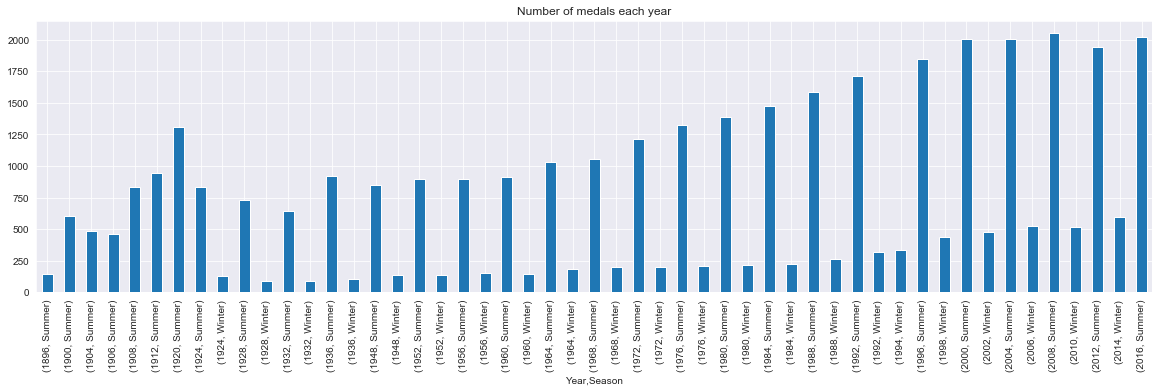

In [34]:
# Number of medals each year
medals.groupby(['Year', 'Season']).Medal.count().plot(kind='bar', title='Number of medals each year')
# another example where we can see how Summer Games more popular than winter. 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001881F9C5278>,
      dtype=object)

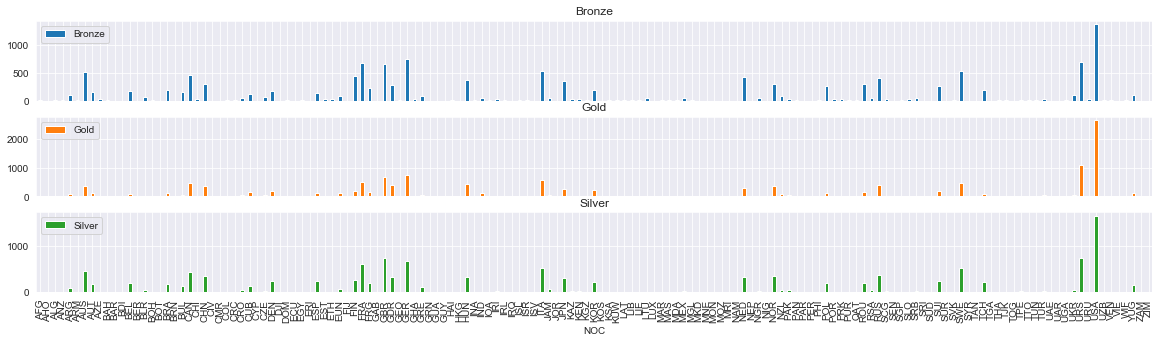

In [27]:
# Team and NOC based analysis

# Most successful teams(NOC)
medals.groupby(['NOC', 'Medal']).Medal.count().unstack(fill_value=0).plot(kind='bar', subplots=True)

# quite a lot of data displayed, but as we can see USA having a lead in number of medals

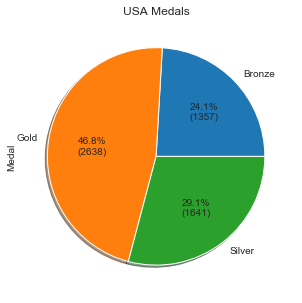

In [28]:
medals.groupby(['NOC', 'Medal']).Medal.count().USA.plot('pie', shadow=True, title="USA Medals",
                                                        autopct=lambda pct: disp_pct(pct, medals.groupby(['NOC', 'Medal']).Medal.count().USA.sum()))
# USA Have bigest number of medals

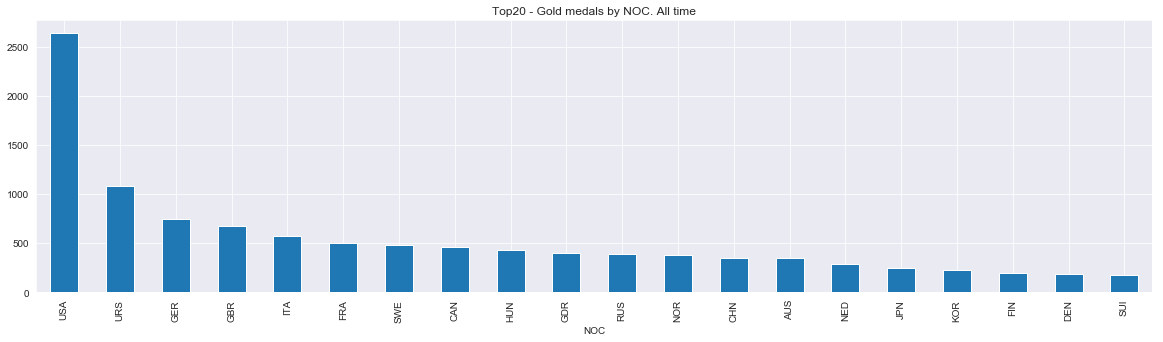

In [30]:
# Top20 - Gold medals by NOC. All time
medals.groupby(['NOC', 'Medal']).Medal.count().unstack(fill_value=0).Gold.sort_values(ascending=False)[:20:].plot(kind='bar', title="Top20 - Gold medals by NOC. All time")

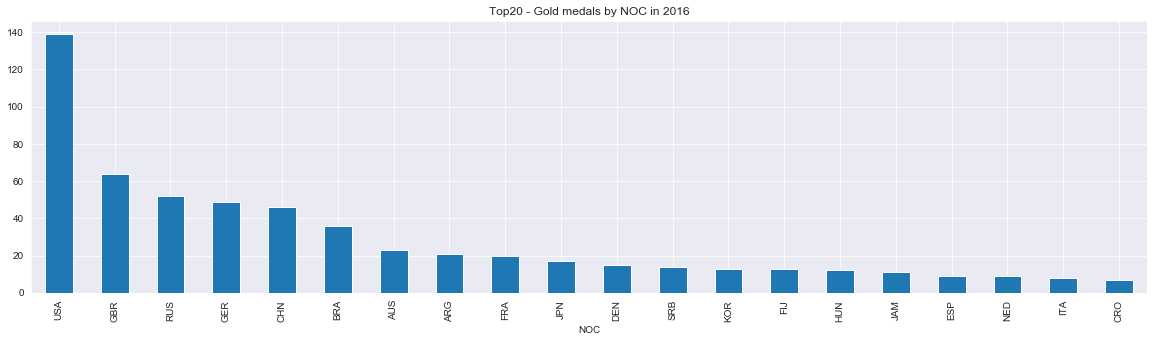

In [33]:
latest.groupby(['NOC', 'Medal']).Medal.count().unstack(fill_value=0).Gold.sort_values(ascending=False)[:20:].plot(kind='bar', title="Top20 - Gold medals by NOC in 2016")
# USA is still on the first place, but GBR and RUS just after!

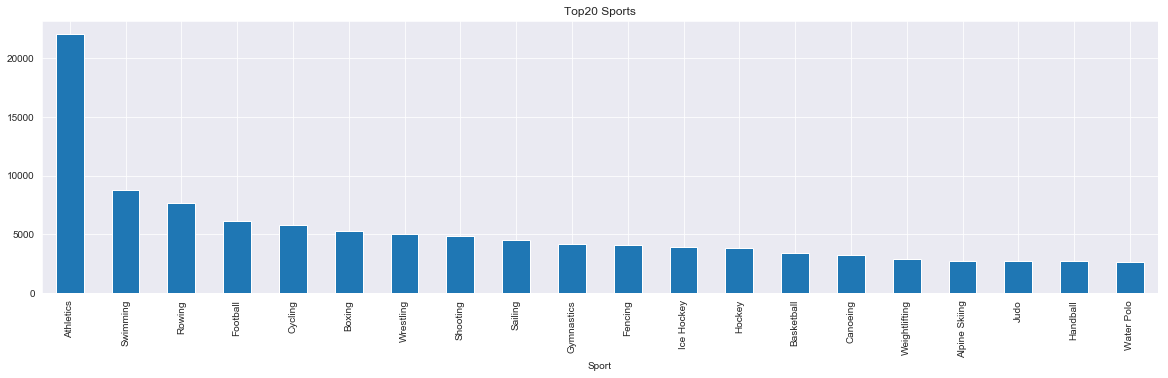

In [35]:
# most popular sports
olympics.groupby('Sport').ID.nunique().sort_values(ascending=False)[:20:].plot(kind='bar', title='Top20 Sports')

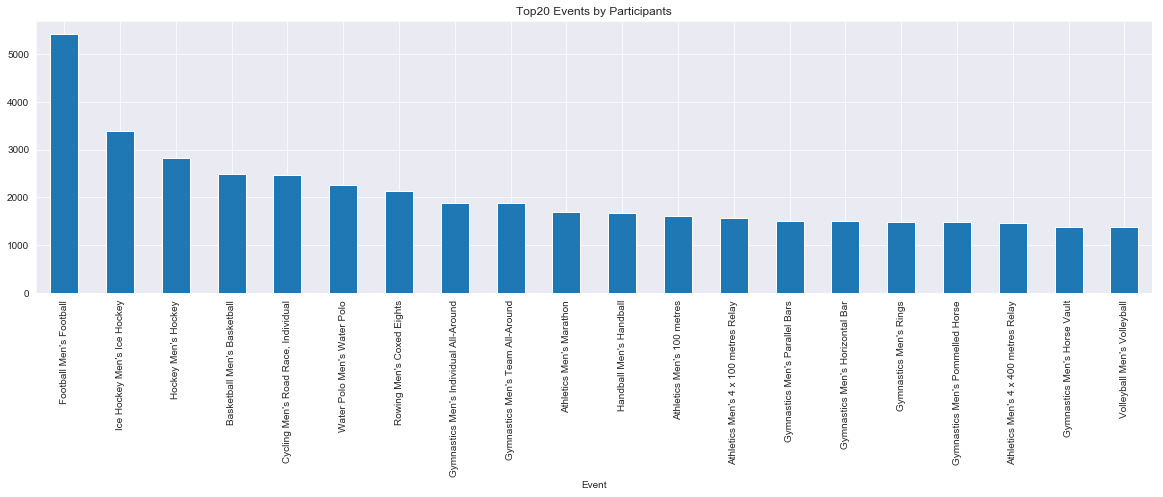

In [36]:
# most popular Events
olympics.groupby('Event').ID.nunique().sort_values(ascending=False)[:20:].plot(kind='bar', title='Top20 Events by Participants')

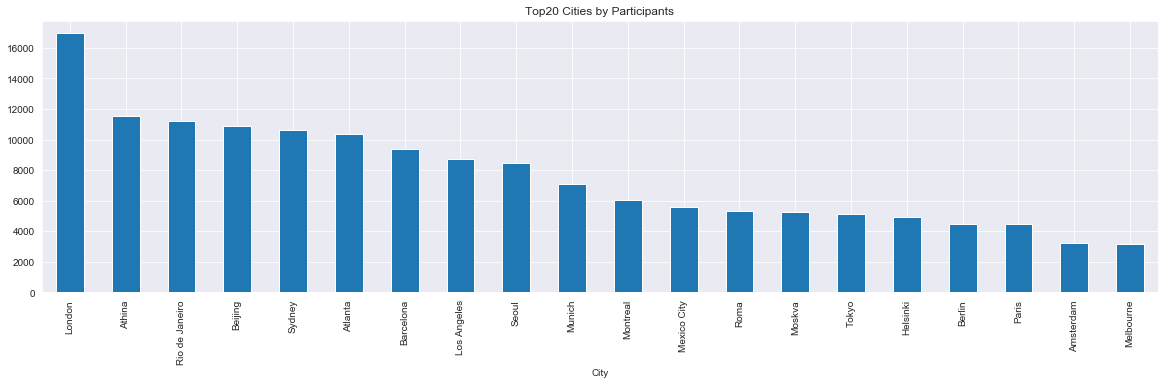

In [37]:
# most popular city by number of participants
olympics.groupby(['City']).ID.nunique().sort_values(ascending=False)[:20:].plot(kind='bar', title='Top20 Cities by Participants')

In [46]:
# Games count in Cities
olympics.groupby(['City']).Games.count().sort_values(ascending=False)[:20:].plot(kind='bar', title='Top20 Cities by Number of games')

SyntaxError: invalid syntax (<ipython-input-46-9b0c72919d1a>, line 2)

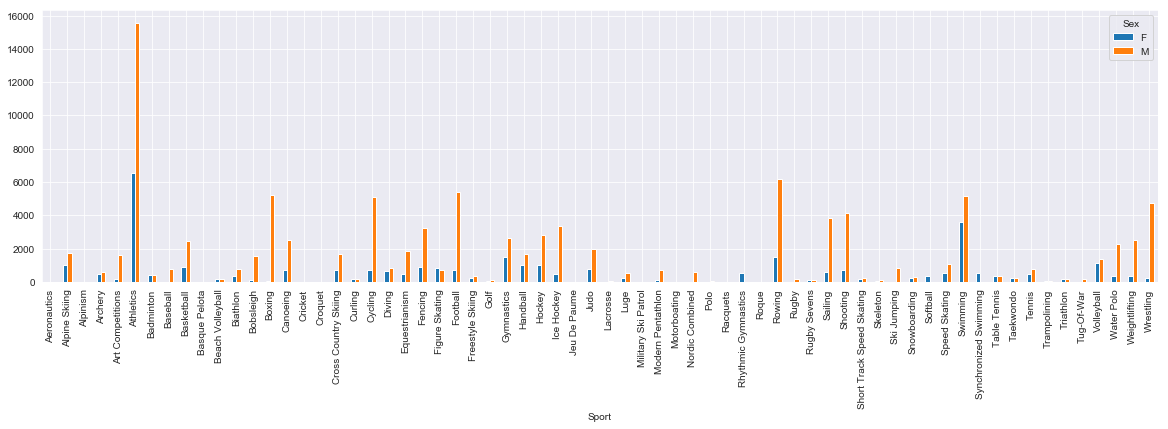

In [43]:
# Sport by gender
olympics.groupby(['Sport', 'Sex']).ID.nunique().unstack(fill_value=0).plot(kind='bar')
# Well, first of all I had no idea that there is an Art Competitions.
# Atheletics are most popular and
# In most sports more male atheletes, which is expected as we have much more male atheletes
# There are some sports like Beach volleyball and Taekwoondo where we have about 50/50 distribution
# and of cause there are sports like Softball and Synchronized Swimming which are Women only

# Keep in mind - this chart shows all atheletes for the last century
# Lets look at the latest games

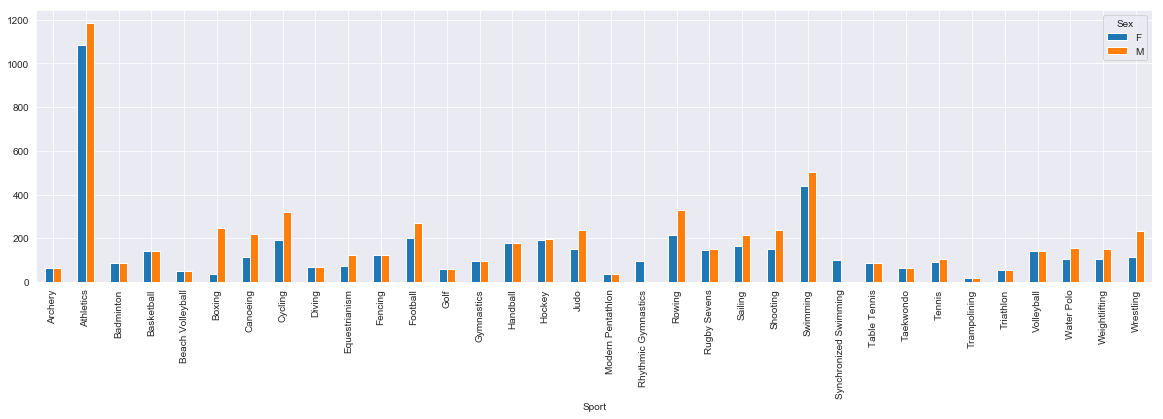

In [44]:
# Latest changes
latest.groupby(['Sport', 'Sex']).ID.nunique().unstack(fill_value=0).plot(kind='bar')

# As we can see we have almost an equal distribution
# Also we have much less sports, which is also expected as list of olimpic sports is constantly being changed. 

In [ ]:
# Conclusion
# The biggest change over the years I've noticed is gender distribution. In earlier years there were no women allowed to participate in the Games 
# and in the recent years we see almost equal gender distribution

# Number of atheletes increases every year, which is probably related to population grow, Olympic Games popularity and increasing freedom of choice.

# Olympic Games are open for every one and for every age, but as these games are highly competitive most atheletes are between 20-30 years old